## Exercise 1

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows
a density function of the form

 $ 
    f(X) = \left\{\begin{array}{lr}
        c(t-1)(2-t), & \text{for } 1\leq t\leq 2\\
        0, & \text{otherwise}
        \end{array}\right\} 
  $
  
 where t is the time in hours.

a) using the $integrate()$ R function, determine the constant c (and verify it analytically)

In [1]:
# We define the density function
f <- function(x) {val <- ifelse((x > 1 & x <2), (x-1)*(2-x), 0)
                return (val)
                 }
                        

In [2]:
#Integrate in order to have the normalization
integral <- integrate(f,
                lower = -Inf,
                upper = Inf)

integral

0.1666667 with absolute error < 7.1e-05

In [3]:
#Since I want that the integral is 1, then c must be=
c <- 1/integral$value
c

[1] 6

In [4]:
#density function with normalization
f <- function(x) {val <- ifelse((x > 1 & x <2), c*(x-1)*(2-x), 0)
                return (val)
                 }

In [5]:
#Lets try to see if the integral is indeed 1
integral_1 <- integrate(f,
                lower = -Inf,
                upper = Inf)$value

integral_1  
# it should be notice that altough is not exactly one. this is given by the error of the intgration

[1] 1

b) write the set of four R functions and plot the pdf and cdf, respectively

In [6]:
#density probability
dounif <- function(x) {val <- ifelse((x > 1 & x <2), 6*(x-1)*(2-x), 0)
                return (val)
                 }

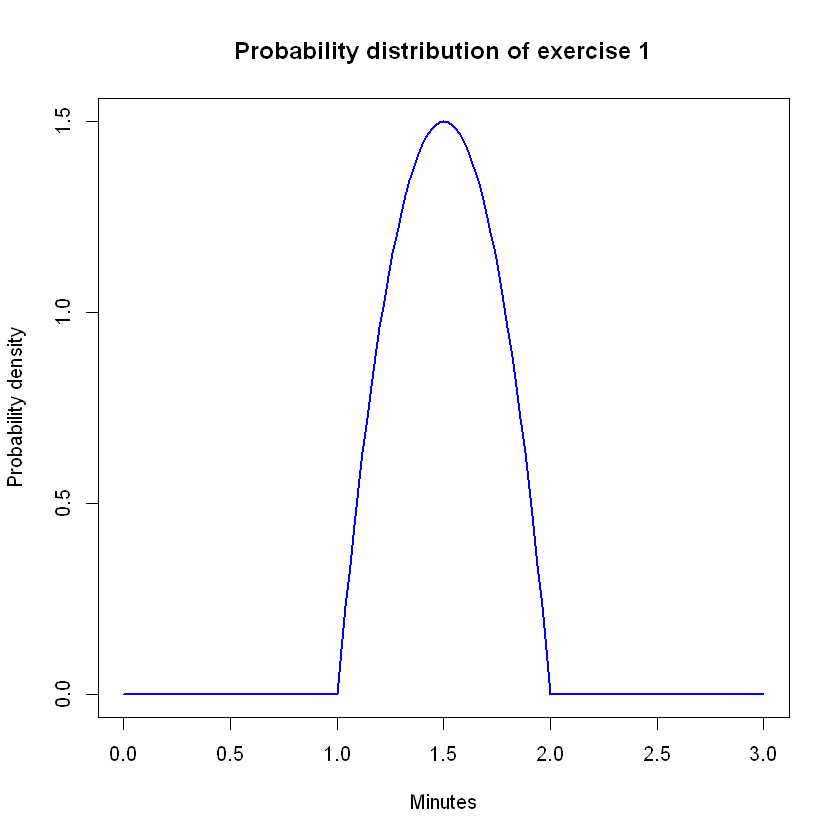

In [7]:
x <-seq(0,3,0.02)
plot(x,f(x),type='l',xlab='Minutes',
     ylab='Probability density',main='Probability distribution of exercise 1',col='blue',lwd=2)

The distribution function is given by integrating the density function:

$\begin{equation}
F(X) = \int_{-\inf}^x 6 (x-1)(2-x)dx
\end{equation}$

Hence for $x <1$, 

$F(X) = 0$

On the other hand, computing for 1<x<2:

$\begin{equation}
F(X) = \int_{1}^x 6 (x-1)(2-x)dx
\end{equation}$

And we get, 

$F(X) = -2x^3+9x^2-12x+5$ for $1<x <2$

and for x>2:

$\begin{equation}
F(X) = \int_{1}^2 6 (x-1)(2-x)dx + 0
\end{equation}$

$F(X) = 1$ for $x >2$

In [8]:
#distribution function  F(x1) = P(X <= x1)
pounif <- function(x) {if(x > 1 & x <2){
                                -2*x**3+9*x**2-12*x+5
                            } else if (x >= 2) {
                                    1
                            } else 0}

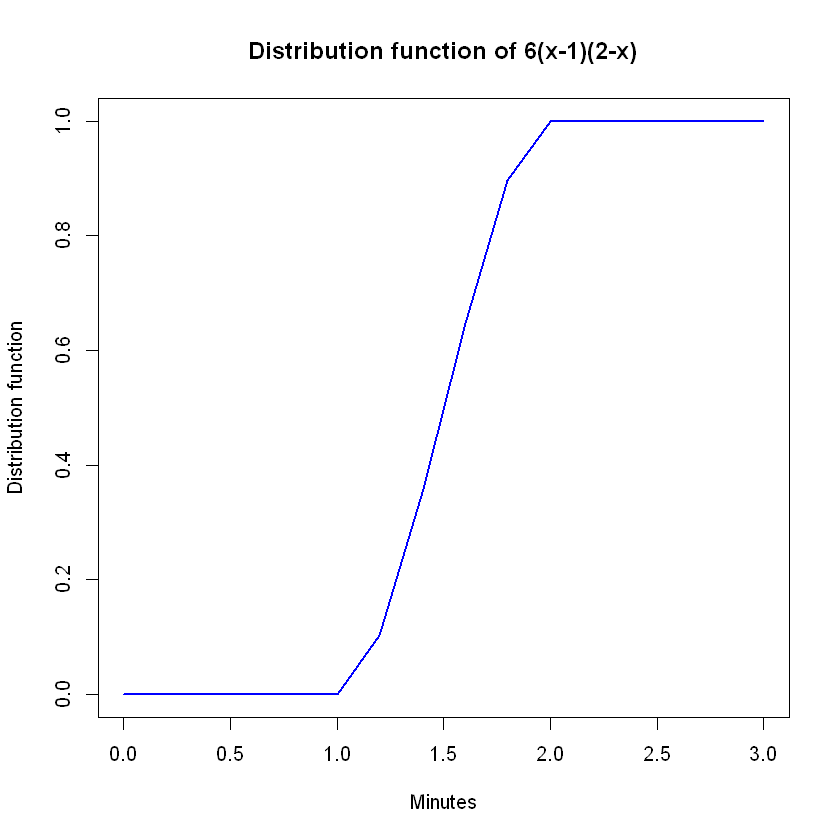

In [9]:
x <- seq(0,3,0.2)

result <- c()
for(i in x) {
        y <- pounif(i)
        result <- c(result, y)
    }

plot(x,result,type='l',xlab='Minutes',
     ylab='Distribution function',main='Distribution function of 6(x-1)(2-x)',col='blue',lwd=2)


The other two function we are going to get it using the acceptance rejection method since the inverse of the function is not solvable. 

efficiency:  0.6622 


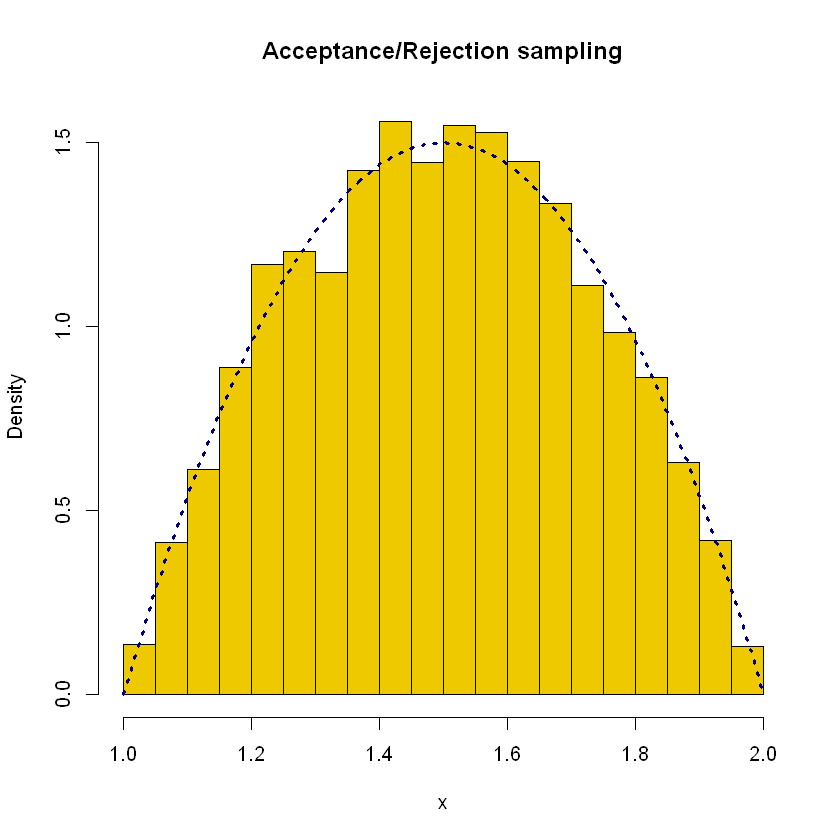

In [10]:
a <- 1; b <- 2
#f.1 <- function(x) {6*(x-1)*(2-x)}
n <- 10000

#We run two uniform numbers.
u.1 <- runif(n, a, b)
u.2 <- runif(n, 0, 1)

#By observing the graph, 
f.max <- 1.5

y <- ifelse(u.2 * f.max < dounif(u.1), u.1, NA)
y.clean <- y[!is.na(y)]


hist(y.clean , breaks=seq(1,2,0.05), freq=FALSE ,
col="gold2", xlim=c(1, 2), xlab="x",
main="Acceptance/Rejection sampling")


curve(dounif, col="navy", lt=3, lw=3, add=TRUE)
efficiency <- length(y.clean )/ length(y)
cat(paste("efficiency: ", efficiency , "\n"))

c) evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

In [11]:
#t is in hours hence, 75 min = 5/4 hours and 90 min = 3/2 hours and 120 min = 2hs
#Then we have to perform P(x<5/4) = F(5/4)
pounif(5/4)

[1] 0.15625

In [12]:
#And for the second part, P(3/2 <x<2)= F(2)-F(3/2)
pounif(2) - pounif(3/2)

[1] 0.5

# Exercise 2

The lifetime of tires sold by an used tires shop is $10^{4} x$ km, where x is a random variable following the distribution function

 $ 
    f(X) = \left\{\begin{array}{lr}
        2/x^2, & \text{for } 1\leq t\leq 2\\
        0, & \text{otherwise}
        \end{array}\right\} 
  $
  
  a) write the set of four R functions and plot the pdf and cdf, respectively

In [1]:
#density function is given by the exercise
f <- function(x) {val <- ifelse((x > 1 & x <2), 2/(x*x), 0)
                return (val)
                 }
                       
#distribution function  F(x1) = P(X <= x1) is given same as ex 1(integrating)
pounif <- function(x) {
    val <- if(x > 1 & x <2){
                                2*(-1/x+1)
                            } else if (x >= 2) {
                                    1
                            } else 0
                       return(val)}


#The cumulative distrbution is given by inverting the function
counif <- function(x) {val <- ifelse((x <1), -2/(x-2), 0)
                return (val)
                 }  


rounif <- function(n) {
    us <- runif(n)
    
    val <- ifelse((us <1 & us>0), -2/(us-2), 0)
                return (val)}

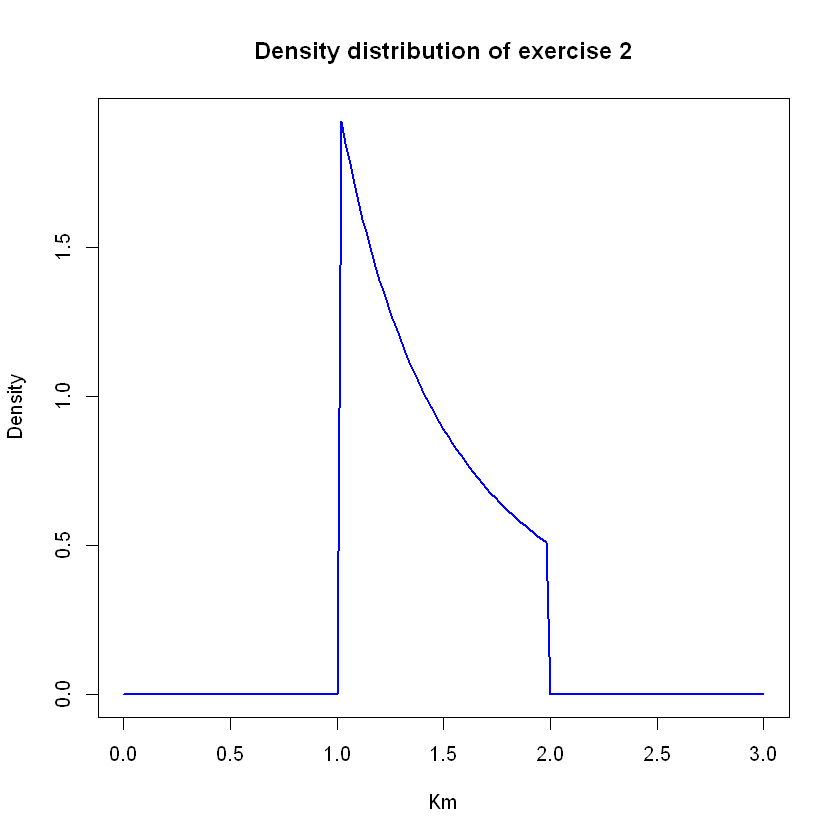

In [2]:
x <-seq(0,3,0.02)
plot(x,f(x),type='l',xlab='Km',
     ylab='Density',main='Density distribution of exercise 2',col='blue',lwd=2)


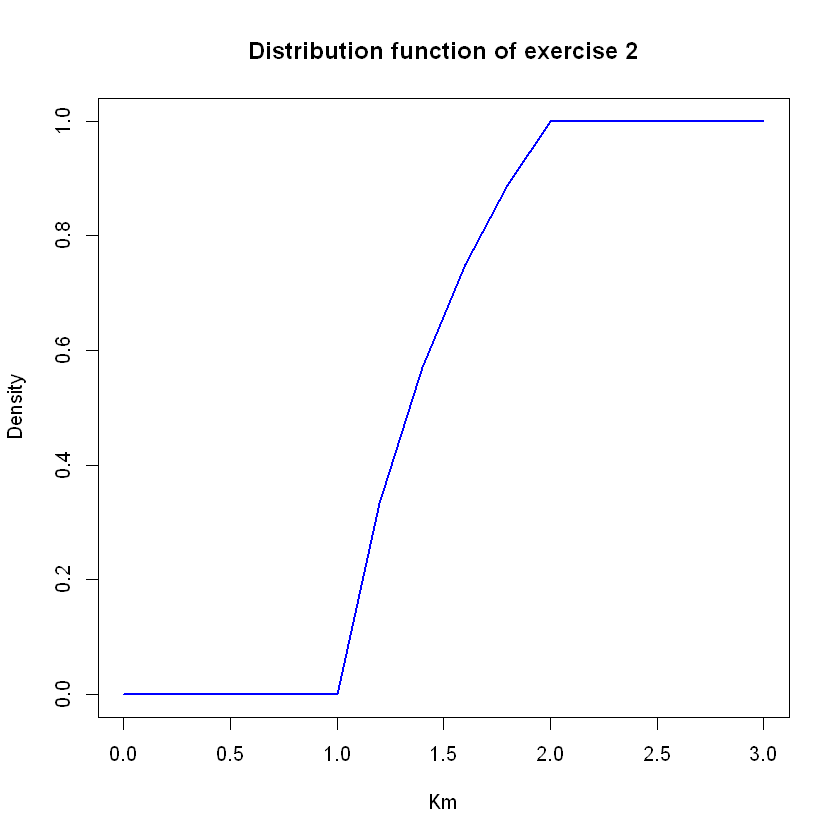

In [3]:
x <- seq(0,3,0.2)

result <- c()
for(i in x) {
        y <- pounif(i)
        result <- c(result, y)
    }

plot(x,result,type='l',xlab='Km',
     ylab='Density',main='Distribution function of exercise 2',col='blue',lwd=2)


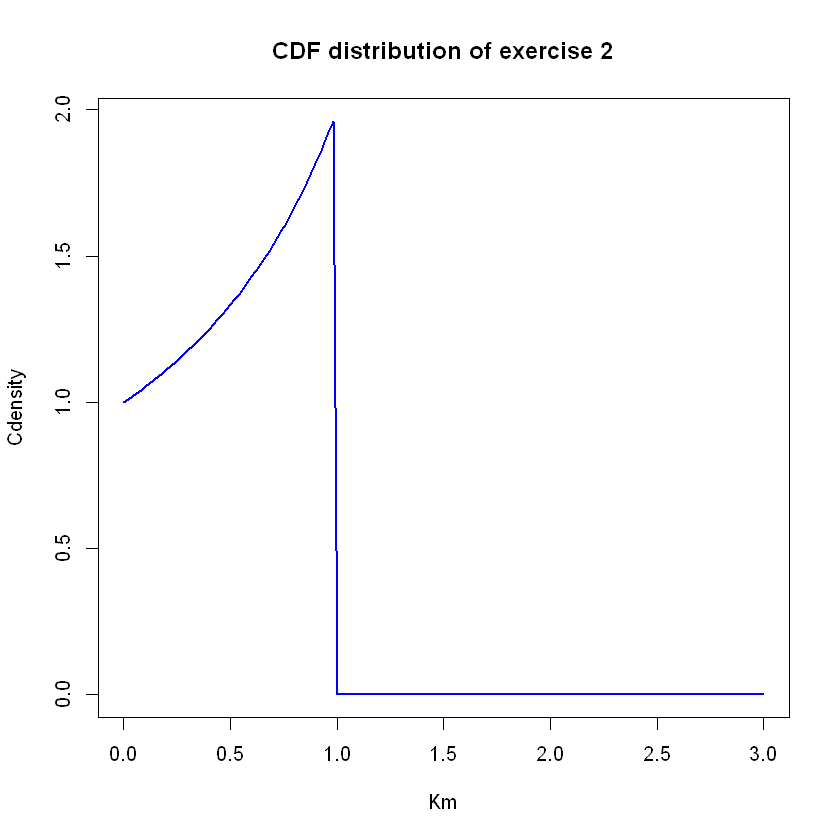

In [4]:
x <-seq(0,3,0.02)
result <- counif(x)

plot(x,result,type='l',xlab='Km',
     ylab='Cdensity',main='CDF distribution of exercise 2',col='blue',lwd=2)


b) determine the probability that tires will last less than 15000 km

In [5]:
#b ) P(X < 1.5) = F(1.5)
pounif(1.5)

[1] 0.6666667

c) sample 3000 random variables from the distribution and determine the mean value and the variance,
using the expression $Var(X) = E[X^2] - E[X]^2$

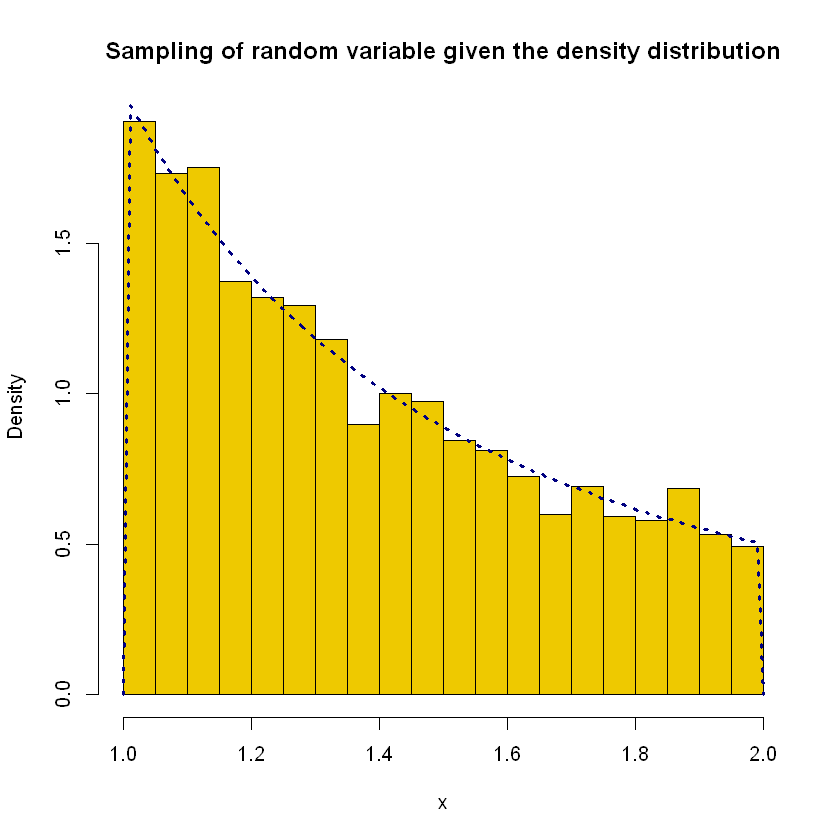

In [7]:
#sample 3000 random variables from the distribution and 
val <- rounif(3000)
val <-val[val!=0] 

hist(val , breaks=seq(1,2,0.05), freq=FALSE ,
col="gold2", xlim=c(1, 2), xlab="x",
main="Sampling of random variable given the density distribution")
curve(f, col="navy", lt=3, lw=3, add=TRUE)

#Whis is indeed the density function

In [19]:
#we define this two variables for simplicity in the formulas
g <- function(x) x * f(x)
g2 <- function(x) x*x * f(x)

#The mean value is given by
EX <- integrate(g,
                lower = 0,
                upper = Inf)$value

print(c("Mean value is", EX))

#the variance is given by
EX2 <- integrate(g2,
                lower = 0,
                upper = Inf)$value

Var = EX2 - EX

print(c("Variance is", Var))

[1] "Mean value is"    "1.38629436251831"
[1] "Variance is"       "0.613705638499465"


# Exercise 3

Marokov's inequality represents an upper boud to probability distributions:

$
P(X \geq k) \leq \frac{E[X]}{k}
$

for $k > 0$

If we deined as function

$
G(k) = 1 - F(k) = P(X \geq k)
$

plot G(k) and the Markov's upper bound for

 a) the exponential, $Exp(\lambda = 1)$, distribution function
 
 Notice that the expected value of the exponential is given by $E[X] = 1/\lambda$

In [20]:
#a)
x <- seq(0,4, 0.05)

#let's define the function
lambda <-1
G <- 1-pexp(x, lambda)

#and the markov inequality is given by
markov <- 1/x

exp <- data.frame(x, G, markov)

In [21]:
library(ggplot2)

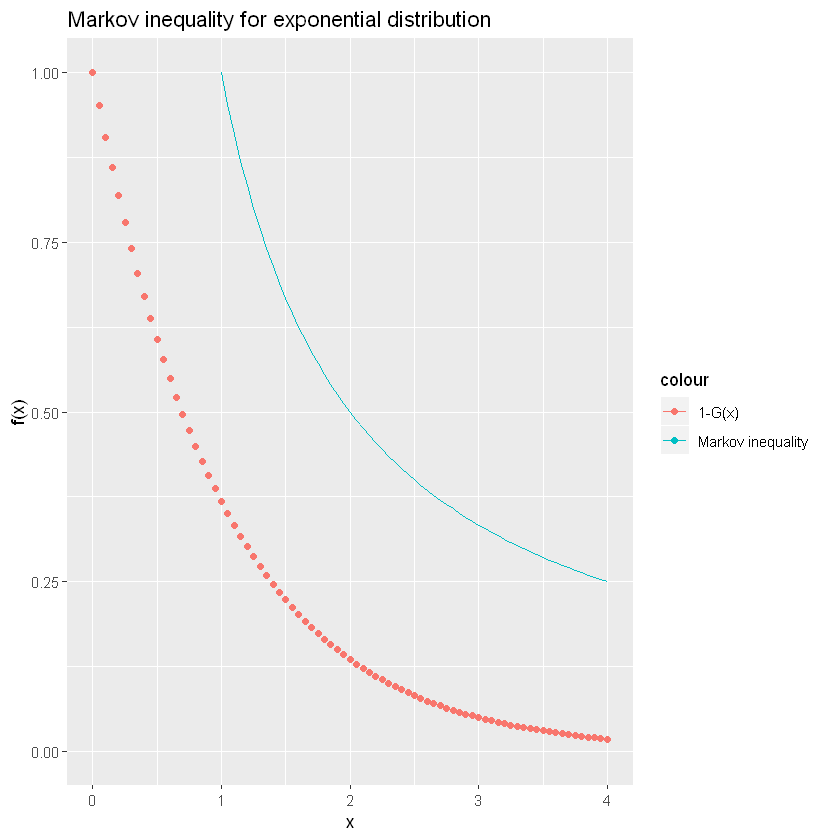

In [22]:
g <- ggplot(exp,aes(x = x,y=G, col = '1-G(x)'))+geom_point()+ggtitle("Markov inequality for exponential distribution")
g <- g + labs( y="f(x)", x = "x") + ylim(c(0,1))
g <- g + geom_line(aes(x = x,y=markov, col = 'Markov inequality'))
g

b) the uniform, U(3; 5), distribution function

Notice that the expected value is given by $E[X] = 1/2 (a+b)$

In [23]:
#uniform distribution
x <- seq(2,8, 0.05)
G <- 1-punif(x, 3, 5)
exxp <- 0.5*(5+3)
markov <- exxp/x

unif <- data.frame(x, G, markov)

Warning message:
"Removed 40 rows containing missing values (geom_path)."

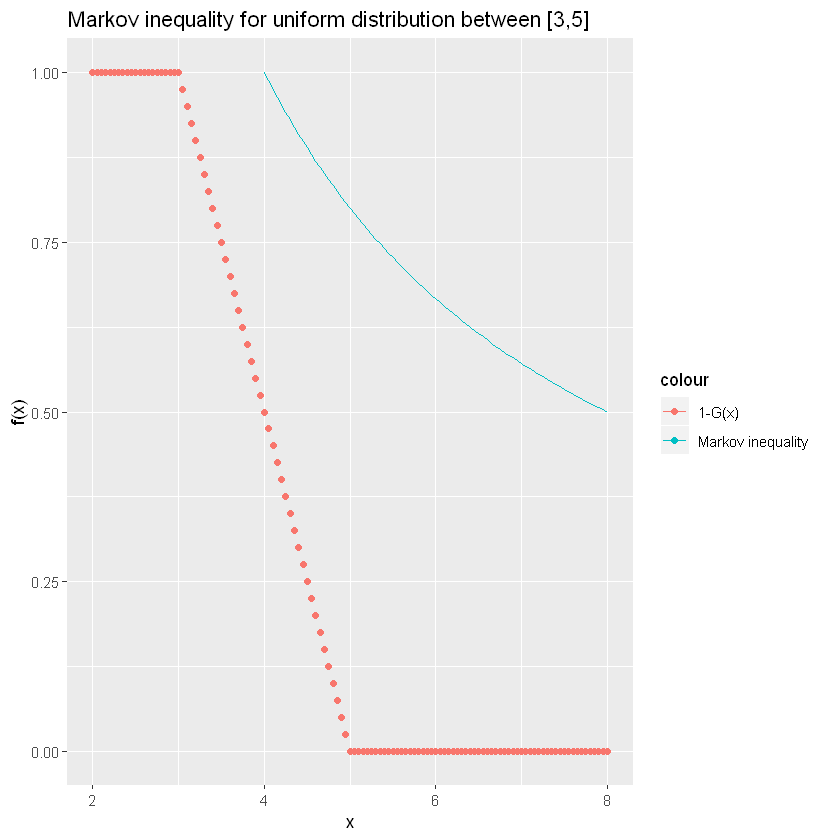

In [24]:
g <- ggplot(unif,aes(x = x,y=G, col = '1-G(x)'))+geom_point()+ggtitle("Markov inequality for uniform distribution between [3,5]")
g <- g + labs( y="f(x)", x = "x") + ylim(c(0,1))
g <- g + geom_line(aes(x = x,y=markov, col = 'Markov inequality'))
g

c) the binomial, Bin(n = 1; p = 1=2), distribution function

The expected value is given by $np$

In [25]:
#Binomial distribution

x <- seq(0,4, 0.05)
G <- 1-pbinom(q = x, size = 1, prob = 1/2)
exxp <- 1/2
markov <- exxp/x

bin <- data.frame(x, G, markov)


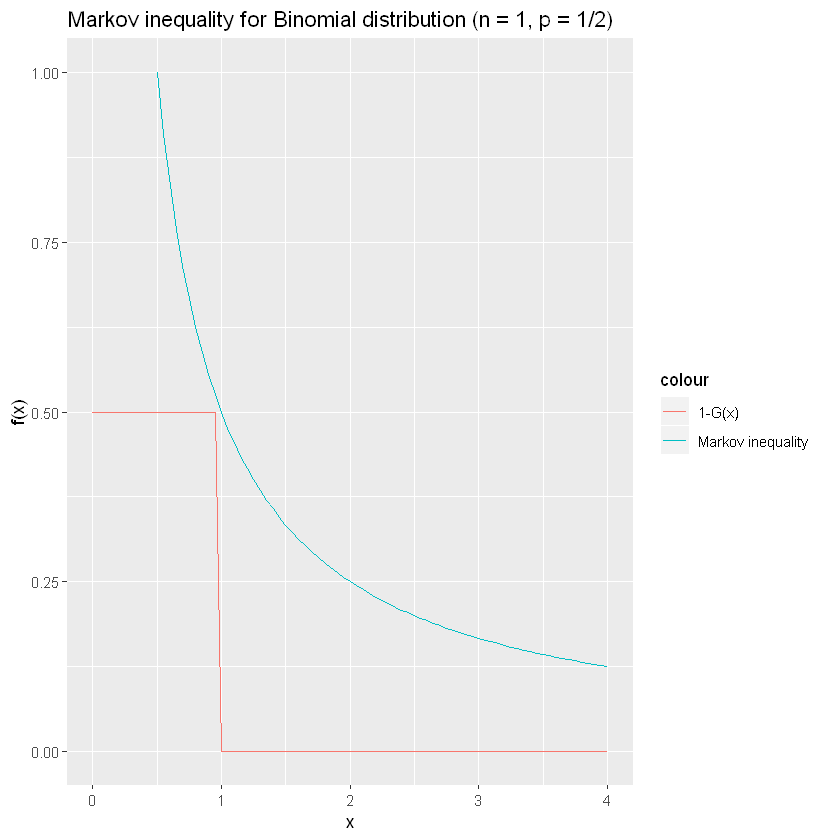

In [26]:
g <- ggplot(bin,aes(x = x,y=G, col = '1-G(x)'))+geom_line()+ggtitle("Markov inequality for Binomial distribution (n = 1, p = 1/2)")
g <- g + labs( y="f(x)", x = "x") + ylim(c(0,1))
g <- g + geom_line(aes(x = x,y=markov, col = 'Markov inequality'))
g

d) a Poisson, $Pois(\lambda = 1/2)$, distribution function

Notice that the expected value is $\lambda$

In [27]:
#pois distribution
k <- 4
x <- seq(0,k, 0.05)
G <- 1-ppois(x, 1/2)

exp_val <- 1/2
markov <- exp_val/x

pois <- data.frame(x, G, markov)


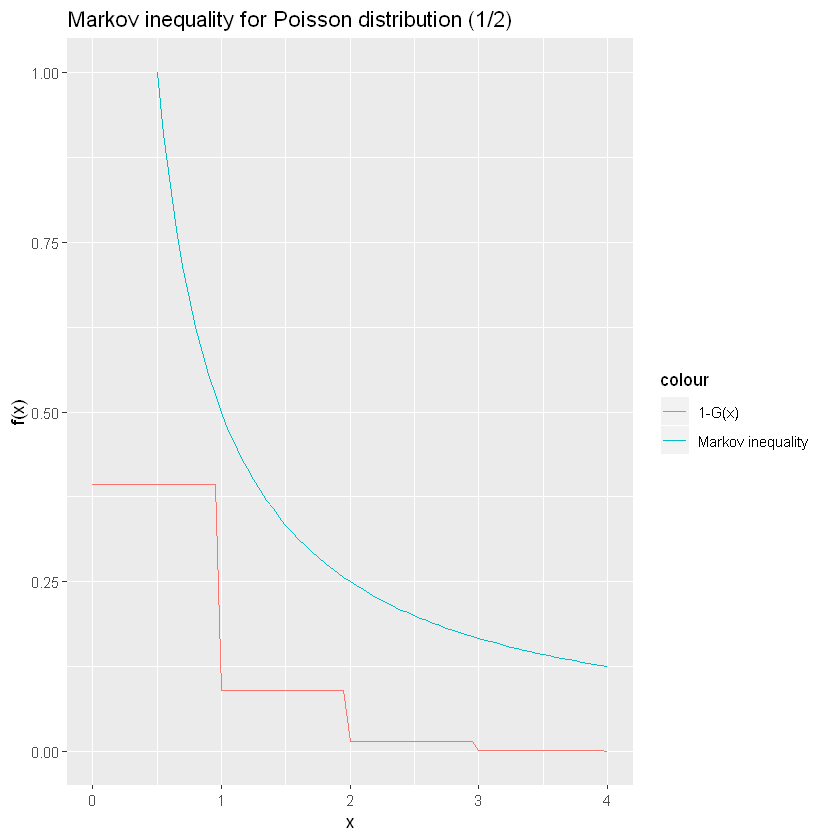

In [28]:
g <- ggplot(pois,aes(x = x,y=G, col = '1-G(x)'))+geom_line()+ggtitle("Markov inequality for Poisson distribution (1/2)")
g <- g + labs( y="f(x)", x = "x") + ylim(c(0,1))
g <- g + geom_line(aes(x = x,y=markov, col = 'Markov inequality'))
g

# Exercise 4


Chebyshev's inequality tell us that

$P(|X-\mu|\geq k \sigma) \leq 1/k^2$

which can also be written as

$P(|X-\mu|\geq k \sigma) \geq 1- 1/k^2$

And this is , 


$
P(\mu -k \sigma < X < \mu +k \sigma) \geq 1 - 1/k^2
$

And noticing that , 

$
P(\mu -k \sigma < X < \mu +k \sigma) = F(\mu +k \sigma) - F(\mu -k \sigma) 
$


a) a normal distribution, $N(\mu= 3; \sigma = 5)$

Then we need to compute F(3+5k) - F(3-k5)

In [29]:
x <- seq(0,4, 0.05)
prob <- pnorm(3+x*5, 3, 5)- pnorm(3-x*5, 3, 5)
chebyshev <- 1 - 1/(x**2)

pois <- data.frame(x, prob, chebyshev)

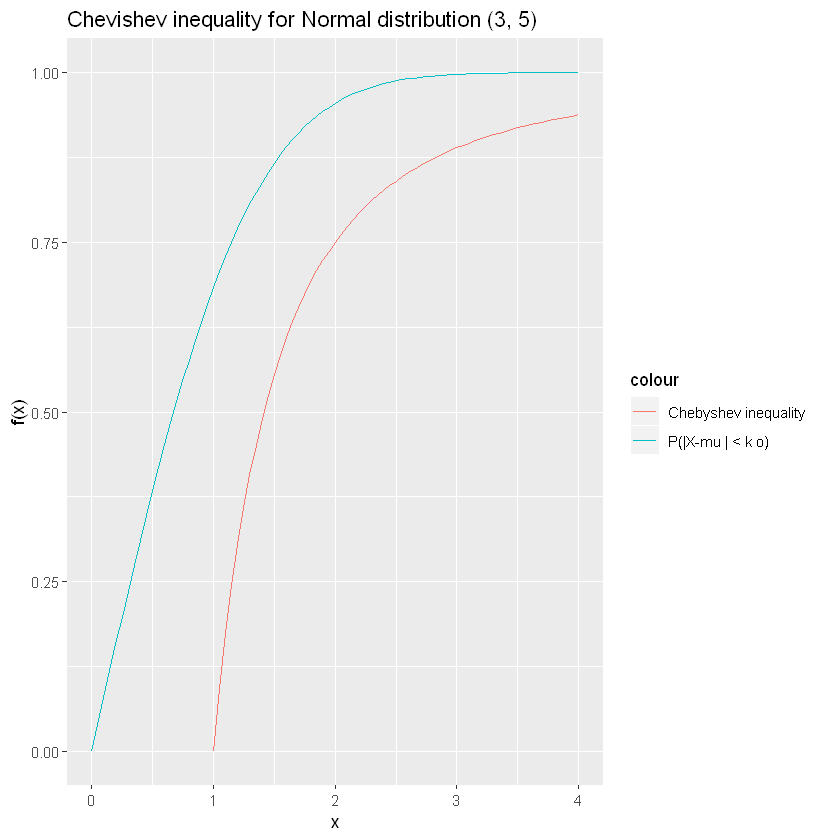

In [30]:
g <- ggplot(pois,aes(x = x,y=prob, col = 'P(|X-mu | < k o)'))+geom_line()+ggtitle("Chevishev inequality for Normal distribution (3, 5)")
g <- g + labs( y="f(x)", x = "x") + ylim(c(0,1))
g <- g + geom_line(aes(x = x,y=chebyshev, col = 'Chebyshev inequality'))
g

a) an exponential distribution, $Exp(\lambda = 1)$

Then $\mu = 1 = \sigma$

In [31]:
#exp distribution
k <- 4
x <- seq(0,k, 0.05)
prob <- pexp(1+x, 1, 1)- pexp(1-x, 1, 1)
chebyshev <- 1 - 1/(x**2)

pois <- data.frame(x, prob, chebyshev)

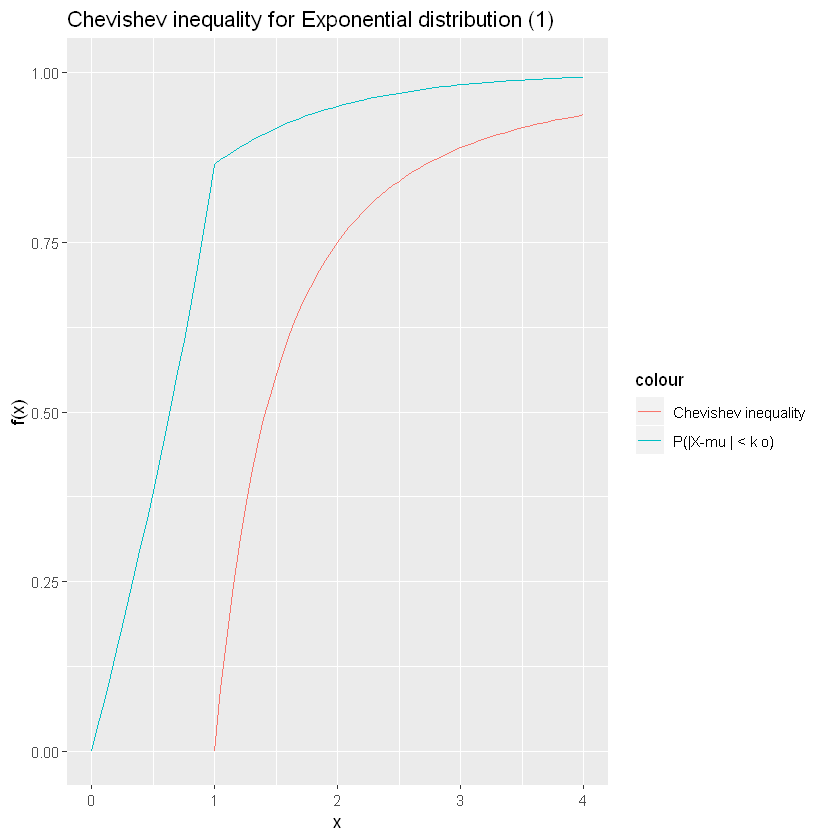

In [33]:
g <- ggplot(pois,aes(x = x,y=prob, col = 'P(|X-mu | < k o)'))+geom_line()+ggtitle("Chevishev inequality for Exponential distribution (1)")
g <- g + labs( y="f(x)", x = "x") + ylim(c(0,1))
g <- g + geom_line(aes(x = x,y=chebyshev, col = 'Chevishev inequality'))
g

b) a uniform distribution, 

then $\mu = (b+a)/2$ and $\sigma^2 = (b-a)^2/12$

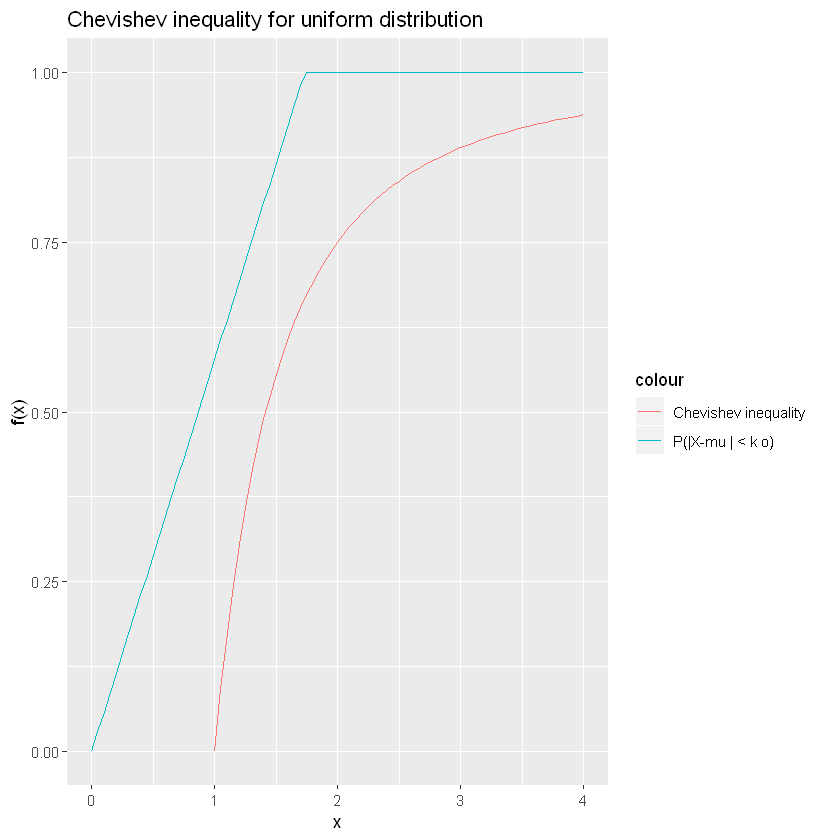

In [36]:
#unif distribution
k <- 4
x <- seq(0,k, 0.05)
a <- 1 - sqrt(2)
b <- 1 + sqrt(2)
mu <- (a + b ) / 2
sd <- sqrt(((b-a)**2)/12)
prob <- punif(mu + x * sd,min = a, max = b)- punif(mu - x * sd,min = a, max = b)
chebyshev <- 1 - 1/(x**2)

pois <- data.frame(x, prob, chebyshev)

g <- ggplot(pois,aes(x = x,y=prob, col = 'P(|X-mu | < k o)'))+geom_line()+ggtitle("Chevishev inequality for uniform distribution")
g <- g + labs( y="f(x)", x = "x") + ylim(c(0,1))
g <- g + geom_line(aes(x = x,y=chebyshev, col = 'Chevishev inequality'))
g

d) Poissn distribution (1/3)

Then $\mu = \lambda$ and $\sigma = \sqrt{\mu}$

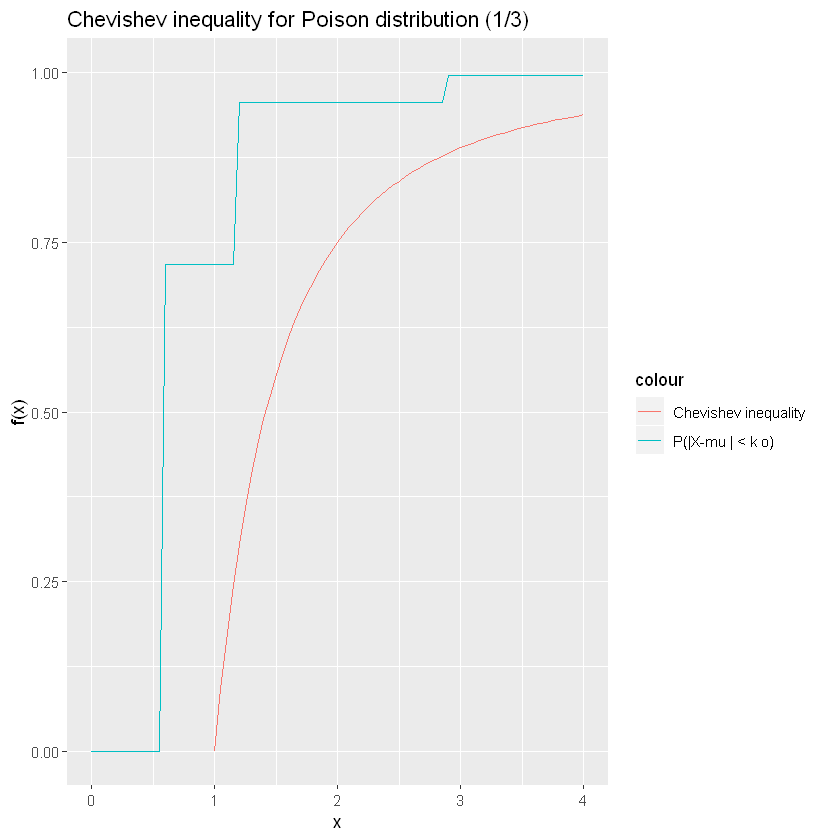

In [37]:
#unif distribution
k <- 4
x <- seq(0,k, 0.05)
lambda <- 1/3
mu <- lambda
sd <- sqrt(lambda)
prob <- ppois(mu + x * sd, lambda)- ppois(mu - x * sd,lambda)
chebyshev <- 1 - 1/(x**2)

pois <- data.frame(x, prob, chebyshev)

g <- ggplot(pois,aes(x = x,y=prob, col = 'P(|X-mu | < k o)'))+geom_line()+ggtitle("Chevishev inequality for Poison distribution (1/3)")
g <- g + labs( y="f(x)", x = "x") + ylim(c(0,1))
g <- g + geom_line(aes(x = x,y=chebyshev, col = 'Chevishev inequality'))
g